# [IMAGPRO] Machine Problem 1: Digital Images and DSP
$\text{submitted by: Pierre Vincent C. Hernandez}$

### Prerequisites / Environment

In order to properly run this notebook and produce it's expected output the 
Jupyter Notebook must be running using:

- **Python**: `^3.10`

Here are the list of specific packages and their version that is going to 
be used in this notebook:

- **NumPy**: `1.26.3`
- **OpenCV**: `4.9.80`
- **Matplotlib**: `3.8.3`

### Imports

Import the necessary packages to run the notebook.

In [25]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

## 1. Matrix Analysis

The images from the dataset under the `/images` will be loaded and resized into 32 by 32 matrices. 

Then, resized images is going to be aggrated into the `imgs_32x32` variable.

In [26]:
# path to dataset
dataset_path = './images'

In [27]:
imgs_32x32_interlinear = [cv.resize(
  src=cv.cvtColor(
  cv.imread(dataset_path + '/' + file), cv.COLOR_BGR2RGB), # Ensures consistent RGB format for all images
  dsize=(32, 32), # Resize to 32x32
  interpolation=cv.INTER_LINEAR) # Use default Bilinear interpolation method
  for file in os.listdir(dataset_path)] # Perform on each image

> According to the OpenCV official docuemntation, the `interpolation` method parameter of the
`cv.resize()` function that was called above has a default `InterpolationFlag` value of
`cv.INTER_LINEAR` which is the preferable interpolation--together with the `cv.INTER_CUBIC`--
when zooming or downscaling the image, and it is faster than the `cv.INTER_CUBIC` interpolation method
while it's still maintining to look OK.


We can also try to use the `cv.INTER_CUBIC` interpolation method just to see if there are any 
differences--other than the speed--between both preferred interpolation methods for zooming.

In [28]:
imgs_32x32_intercubic = [cv.resize(
  src=cv.cvtColor(
  cv.imread(dataset_path + '/' + file), cv.COLOR_BGR2RGB), # Ensures consistent RGB format for all images
  dsize=(32, 32), # Resize to 32x32
  interpolation=cv.INTER_CUBIC) # Use default Bicubic interpolation method
  for file in os.listdir(dataset_path)] # Perform on each image

### 1.0 Visualizing the images

Visualize the images using `Pyplot`.

#### Resized images using Bilinear Interpolation

The resized images that was using the Bilinear Interpolation for resizing the images is going to be visualized first.

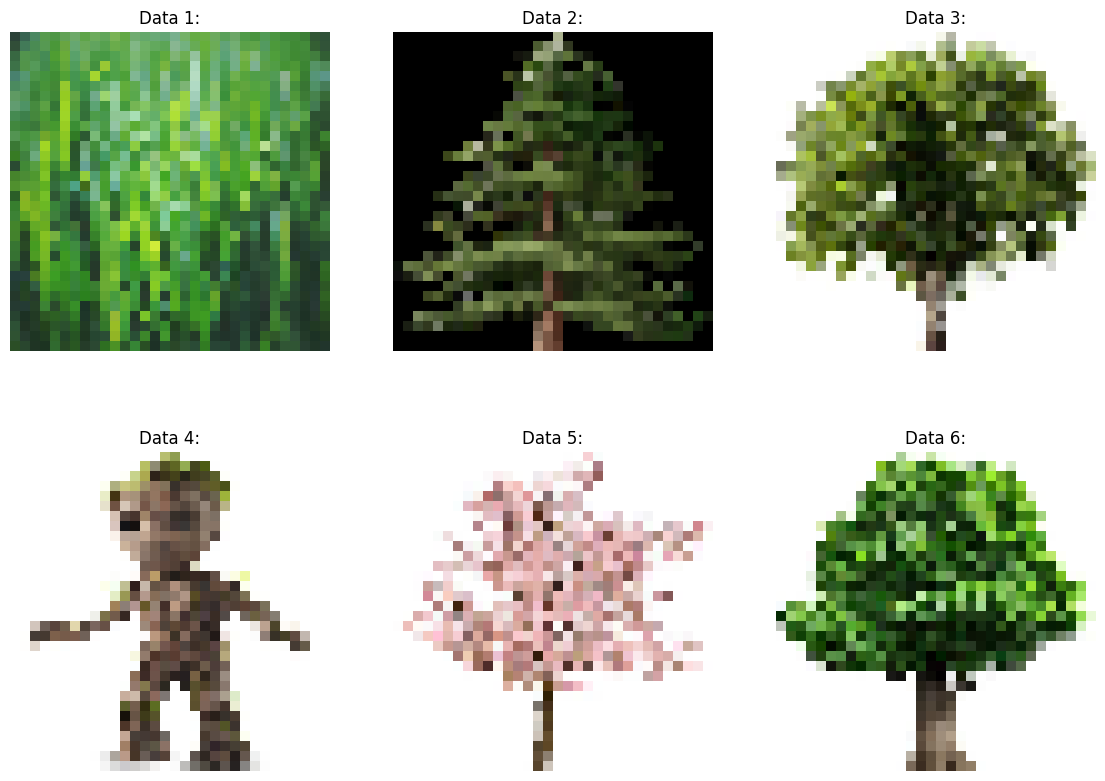

In [29]:
# -- BILINEAR INTERPOLATION --
# Setup matplotlib to have 2 rows and 3 columns for the images
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
# Flatten `axes` to easily loop through adding and visualizing the images
axes = axes.ravel()
for i in range(6):
  axes[i].imshow(imgs_32x32_interlinear[i])
  axes[i].set_title(f'Data {i + 1}:')
  axes[i].axis('off')
plt.tight_layout # auto-adjust spacing and paddings between images
plt.show()

As seen in the images plotted above, the appearance appears  more pixelated. Due to the pixels being limited to the given size,
its quality decreased since it has to compress or fit as much information into each pixel.

#### Resized images using Bicubic Interpolation

The resized images that was using the Bilinear Interpolation for resizing the images is going to be visualized next.

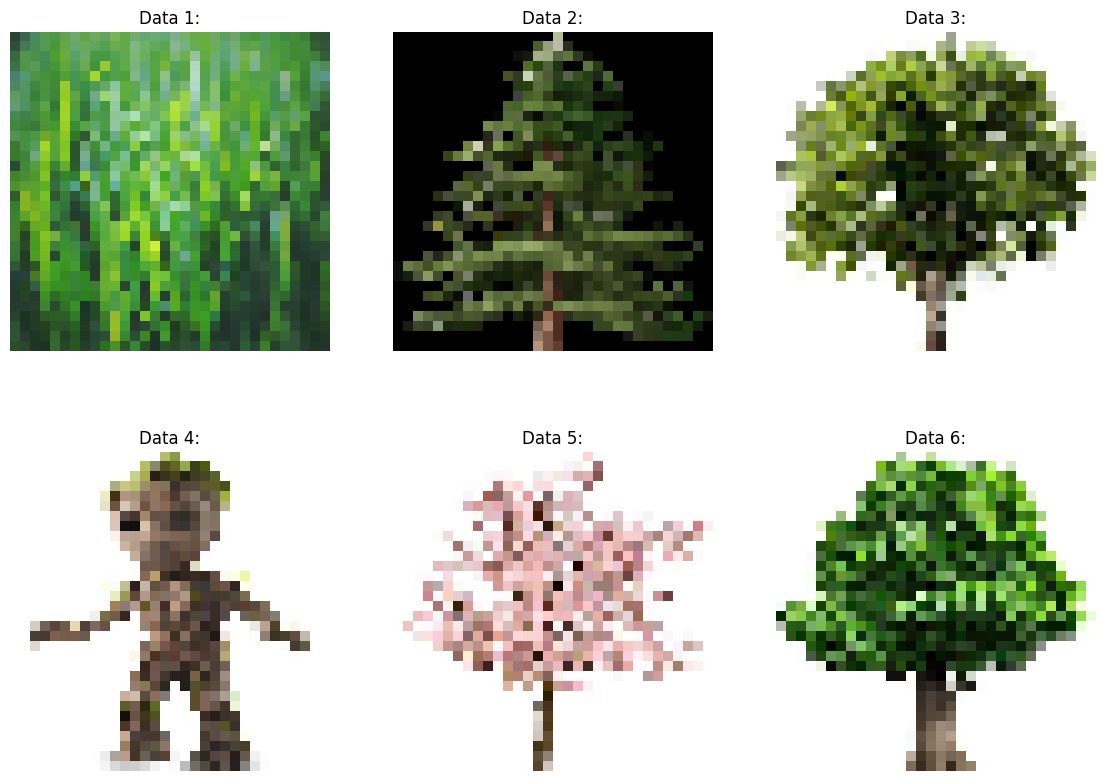

In [30]:
# -- BICUBIC INTERPOLATION --
# Setup matplotlib to have 2 rows and 3 columns for the images
fig, axes = plt.subplots(2, 3, figsize=(14, 10))
# Flatten `axes` to easily loop through adding and visualizing the images
axes = axes.ravel()
for i in range(6):
  axes[i].imshow(imgs_32x32_intercubic[i])
  axes[i].set_title(f'Data {i + 1}:')
  axes[i].axis('off')
plt.tight_layout # auto-adjust spacing and paddings between images
plt.show()

Based on the plotted images above, it seems that the quality of the images is not that far apart from each other.

#### Comparison

In order to properly discern the difference in quality of the resized image between using Bilinear Interpolation and Bicubic Interpolation, then the images of each 
interpolation methods must be plotted side-by-side.

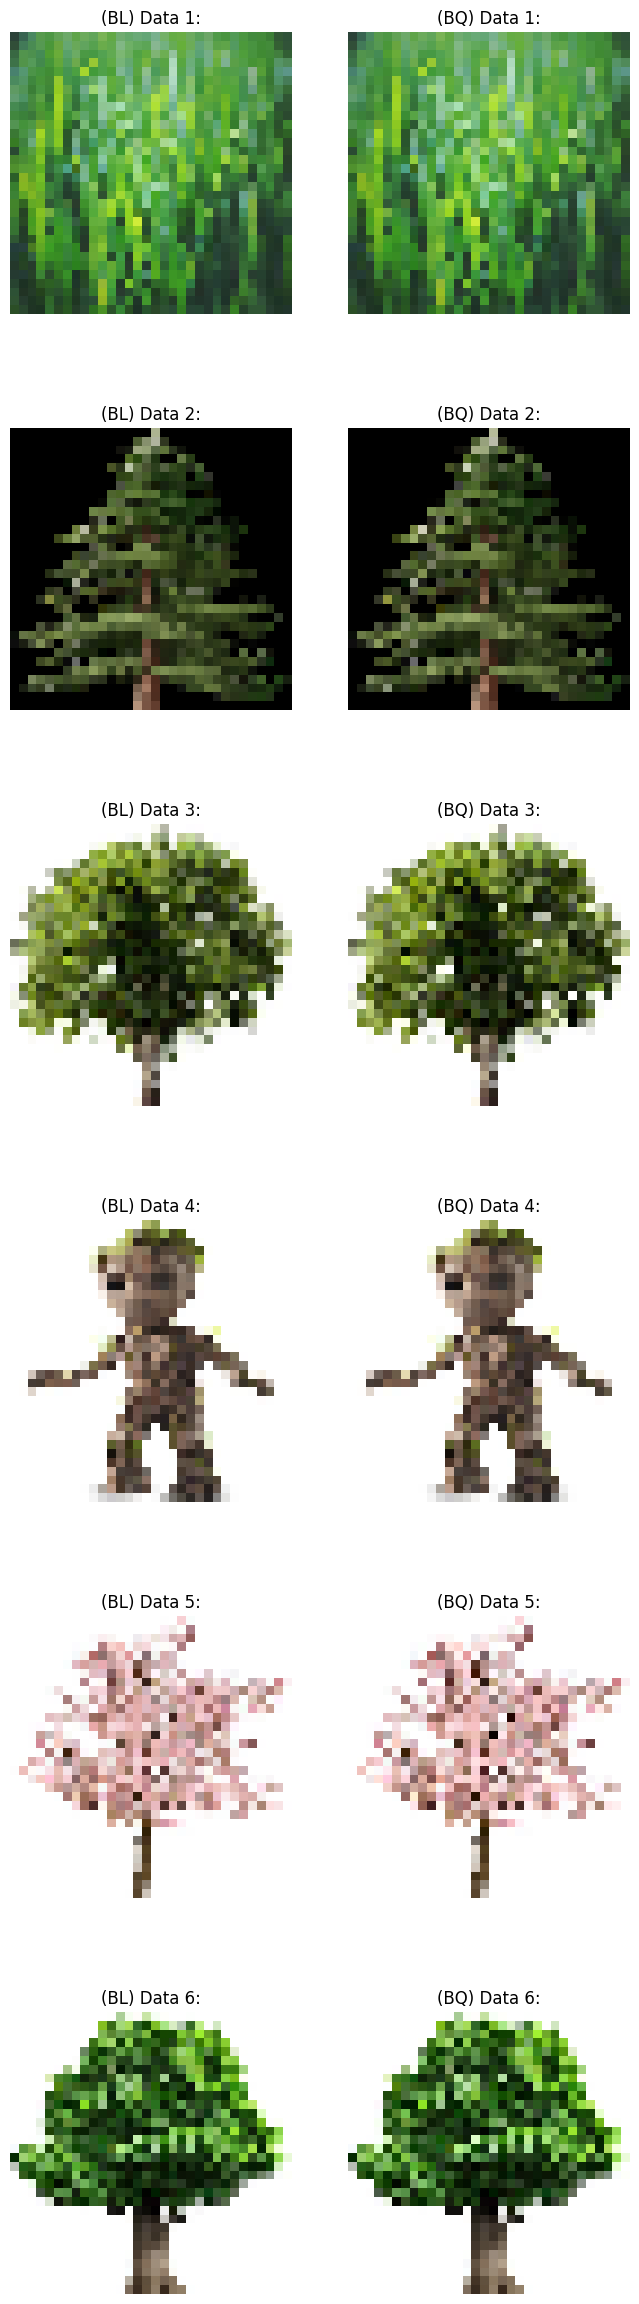

In [44]:
# -- BICUBIC INTERPOLATION --
# Setup matplotlib to have 2 rows and 3 columns for the images
fig, axes = plt.subplots(6, 2, figsize=(8, 30))
# Flatten `axes` to easily loop through adding and visualizing the images
axes = axes.ravel()
num = 0
for i in range(6):
  axes[num].imshow(imgs_32x32_interlinear[i])
  axes[num].set_title(f'(BL) Data {i + 1}:')
  axes[num].axis('off')
  axes[num + 1].imshow(imgs_32x32_intercubic[i])
  axes[num + 1].set_title(f'(BQ) Data {i + 1}:')
  axes[num + 1].axis('off')
  num = num + 2
plt.tight_layout # auto-adjust spacing and paddings between images
plt.show()

As displayed in the plot above, it's more apparent that the quality of the resized images when using Bicubic interpolation has a little bit more contrast compared to 
the resized images that uses the Bilinear interpolation.

For the sake of simplicity of the project, we'll be using the resized images that used
*Bilinear Interpolation* (default for the `resize()` function), 
`imgs_32x32_interlinear`, for resizing images to `32x32`. That variable is going to 
be reassigned to `imgs_32x32` to serve as the holder of the chosen resized images 
that uses the chosen interpolation method.

In [38]:
imgs_32x32 = imgs_32x32_interlinear # or imgs_32x32_intercubic

### 1.1 Shape of the images

We need to determine the shape of each image variable to see if they all
have been resized to a `32x32` image version of itself. This is going to be done
by turning the resized images into a **`numpy` array** and then use the `shape()`
method to see the shape of the images.

In [41]:
t_imgs_32x32 = np.array(imgs_32x32)
t_imgs_32x32.shape

(6, 32, 32, 3)

The tensor of the images has a shape of `(6, 32, 32, 3)` as displayed above. 

**Explanation:**

This means that the tensor contains exactly `6` images that has a width and 
height of `32`, and it contains `3` channels.

### 1.2 Saving the images numpy array (or tensor)


The images numpy array (tensor) is going to saved in or exported to 
an `.npy`, `imgs_32x32.npy`. This is to easily load the tensor when it is needed.

In [42]:
# Save the images numpy array or tensor to a .npy file
np.save('imgs_32x32.npy', t_imgs_32x32)

## 2. Image Statistics

Next we'll focus on the image statistics of the first image only, the `data1.jpg`.

### 1.1 Total number of pixels

#### First image

We can get the total number of **RGB pixels** by calling the `size` attribute of the first image. 
Then for the **Grayscale pixels**, we can use the `shape` attribute of the first image to retrieve
the total number of pixels per row and column, and multiply them to each other.

In [52]:
rgb_pixels_num_first_img = imgs_32x32[0].size
h, w = imgs_32x32[0].shape[:2]
gray_pixels_num_first_img = h * w
print(f'Total RGB pixels: {rgb_pixels_num_first_img}')
print(f'Total Grayscale pixels: {gray_pixels_num_first_img}')

Total RGB pixels: 3072
Total Grayscale pixels: 1024


By looking at the results above, the total number of **RGB pixels** is `3072` while the total number
of **Grayscale pixels** is `1024`.

#### All images

Next, we'll compute for the total number of pixels in the image dataset. 
We can also apply the same techniques that was already done before.

In [53]:
rgb_pixels_num_all_imgs = t_imgs_32x32.size
i_n, h_n, w_n = t_imgs_32x32.shape[:3]
gray_pixels_num_all_imgs = i_n * h_n * w_n
print(f'Total RGB pixels: {rgb_pixels_num_all_imgs}')
print(f'Total Grayscale pixels: {gray_pixels_num_all_imgs}')

Total RGB pixels: 18432
Total Grayscale pixels: 6144


It is observed that the total number of **RGB pixels** for the image dataset is `18432`
while the **Grayscale pixels** was observed to have a total of `6144` for the image dataset,
as seen above. 